<a href="https://colab.research.google.com/github/kj1103/cwiczenia1/blob/main/drzewa_decyzyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set(font_scale=1.3)
np.random.seed(42)

In [2]:
raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = [name.replace(' ', '_')[:-5] for name in all_data['feature_names']]
target_names = all_data['target_names']

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca: {target_names}')

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


In [3]:
df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


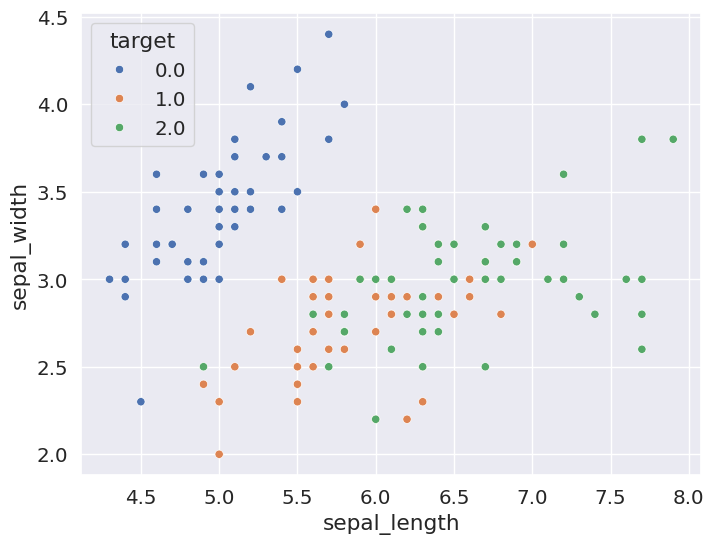

In [11]:
plt.figure(figsize=(8, 6))
_= sns.scatterplot(x='sepal_length', y='sepal_width', hue='target', data=df, legend='full', palette=sns.color_palette()[:3])

In [13]:
df['target'].value_counts()

,count
target,
0.0,50
1.0,50
2.0,50


In [17]:
data = df.copy()
data= data [['sepal_length', 'sepal_width','target']]
target= data.pop('target')

data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [18]:
target.head()

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [19]:
data = data.values
target = target.values.astype('int16')

In [20]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=42)
classifier.fit(data, target)

DecisionTreeClassifier(max_depth=1, random_state=42)

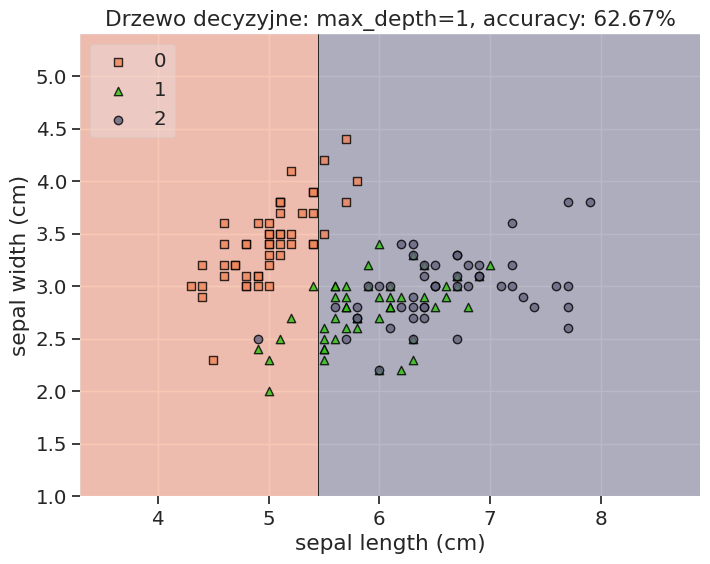

In [21]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(data, target)

plt.figure(figsize=(8, 6))
plot_decision_regions(data, target, classifier, legend=2, colors=colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%')
plt.show()

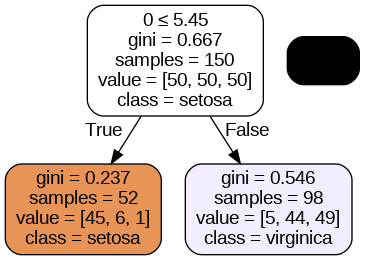

In [28]:
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=list(range(2)),
                class_names=target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('grpah.png')
Image(graph.create_png(),width=300)


budowa drzewa decyzyjnego

In [32]:
def make_decision_tree(max_depth=1):
    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=2)
    classifier.fit(data,target)

    dot_data = StringIO()
    export_graphviz(classifier, out_file=dot_data, feature_names=list(range(2)),  # Corrected: clsssifier to classifier
                  class_names=target_names, filled=True, rounded=True, special_characters=True)
    graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    # obliczenie dokładności
    acc = classifier.score(data, target)

    # wykreślenie granic decyzyjnych
    colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
    plt.figure(figsize=(8, 6))
    ax = plot_decision_regions(data, target, classifier, legend=0, colors=colors)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['setosa', 'versicolor', 'virginica'], framealpha=0.3)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.title(f'Drzewo decyzyjne: max_depth={max_depth}, accuracy={acc * 100:.2f}')

    return Image(graph.create_png(), width=200 + max_depth * 120)

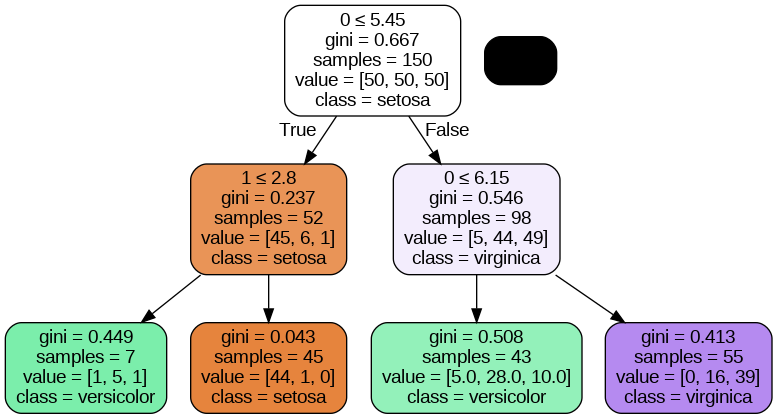

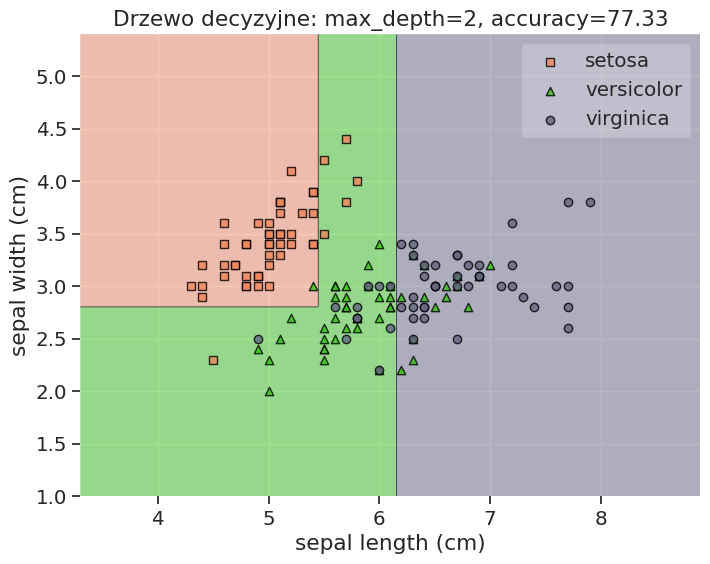

In [33]:
make_decision_tree(max_depth=2)
